In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('thyroid.csv')
df.tail(1000)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
2772,25,F,f,f,f,f,f,f,f,f,...,t,21,t,1.1,t,19,f,?,other,N
2773,84,M,f,f,f,f,f,f,f,f,...,t,82,t,0.74,t,110,f,?,SVI,P
2774,82,M,f,f,f,f,f,f,f,f,...,t,68,t,0.77,t,88,f,?,SVI,P
2775,55,M,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
2776,79,M,f,f,f,f,f,f,f,f,...,t,116,t,0.85,t,137,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [3]:
df1=df[['TSH','binaryClass']]
df1.tail(1000)

,TSH,binaryClass
2772,468,N
2773,3.6,P
2774,2.2,P
2775,?,P
2776,1.1,P
...,...,...
3767,?,P
3768,1,P
3769,5.1,P
3770,0.7,P


In [4]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

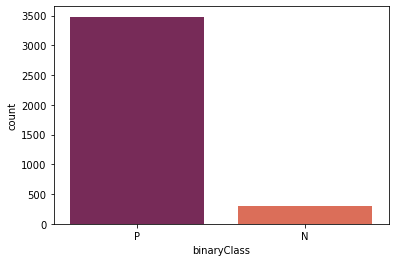

In [6]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

In [7]:
df['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [8]:
df['binaryClass'].replace({'P':0,'N':1},inplace=True)

In [9]:
df['binaryClass'].unique()

array([0, 1], dtype=int64)

In [10]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['binaryClass']==0)] 
df_minority = df[(df['binaryClass']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 3481, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

In [11]:
df['binaryClass'].value_counts()

1    3481
0    3481
Name: binaryClass, dtype: int64

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

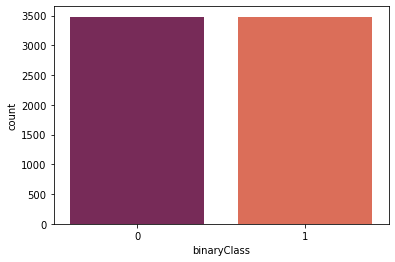

In [12]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

In [13]:
# FIG=df.boxplot(column='TSH')
# FIG

In [14]:
df.tail(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
3761,38,F,f,f,f,f,f,f,f,f,...,t,96,t,0.98,t,99,f,?,other,0
3762,61,M,f,f,f,f,f,f,f,f,...,t,72,t,0.7,t,103,f,?,other,0
3763,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,0
3764,54,M,f,f,f,f,f,f,f,f,...,t,89,t,0.85,t,104,f,?,SVI,0
3765,73,F,t,f,f,f,f,f,f,f,...,t,104,t,1.13,t,92,f,?,SVI,0
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,0
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,0
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,0
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,0
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,0


In [15]:
df1=df[['TSH','binaryClass']]
df1.tail(10)

,TSH,binaryClass
3761,2.8,0
3762,?,0
3763,?,0
3764,1.2,0
3765,8.5,0
3767,?,0
3768,1,0
3769,5.1,0
3770,0.7,0
3771,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 1181 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        6962 non-null   object
 1   sex                        6962 non-null   object
 2   on thyroxine               6962 non-null   object
 3   query on thyroxine         6962 non-null   object
 4   on antithyroid medication  6962 non-null   object
 5   sick                       6962 non-null   object
 6   pregnant                   6962 non-null   object
 7   thyroid surgery            6962 non-null   object
 8   I131 treatment             6962 non-null   object
 9   query hypothyroid          6962 non-null   object
 10  query hyperthyroid         6962 non-null   object
 11  lithium                    6962 non-null   object
 12  goitre                     6962 non-null   object
 13  tumor                      6962 non-null   object
 14  hypop

In [17]:
df['TSH']

1181    6.8
3535    109
1244     60
800      55
2255     12
       ... 
3767      ?
3768      1
3769    5.1
3770    0.7
3771      1
Name: TSH, Length: 6962, dtype: object

In [18]:
df['age']=pd.to_numeric(df['age'], errors='coerce')
meana=df['age'].mean()
df['age'].fillna(meana,inplace=True)


In [19]:
df['age'].value_counts()

60.000000     279
62.000000     219
68.000000     210
63.000000     204
50.000000     169
             ... 
4.000000        1
5.000000        1
455.000000      1
6.000000        1
51.870565       1
Name: age, Length: 94, dtype: int64

In [20]:
type(df['age'][0])

numpy.float64

In [21]:
df['TSH']=pd.to_numeric(df['TSH'], errors='coerce')

In [22]:
type(df['TSH'][0])


numpy.float64

In [23]:
mean=df['TSH'].mean()
mean

22.35495677233436

In [24]:
df['TSH'].fillna(mean,inplace=True)

In [25]:
type(df['TSH'][0])

numpy.float64

In [26]:
df['sex'].value_counts()

F    4846
M    1868
?     248
Name: sex, dtype: int64

In [27]:
df['sex'].replace('?',"F",inplace=True)


In [28]:
df['sex'].value_counts()

F    5094
M    1868
Name: sex, dtype: int64

In [29]:
df['sex'].replace({'F':0,'M':1},inplace=True)

In [30]:
df['sex']=pd.to_numeric(df['sex'], errors='coerce')
type(df['sex'][0])

numpy.int64

In [31]:
df['sex'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='count'>

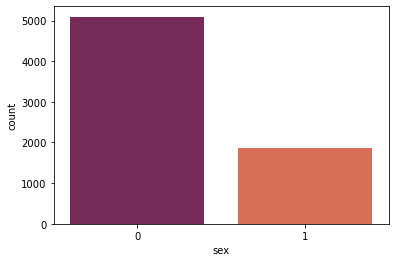

In [32]:
sns.countplot(x='sex', data=df, palette='rocket')

In [33]:
df['on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [34]:
df['on thyroxine'].replace({'f':0,'t':1},inplace=True)

In [35]:
df['on thyroxine']=pd.to_numeric(df['on thyroxine'], errors='coerce')
type(df['on thyroxine'][0])

numpy.int64

In [36]:
df['query on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [37]:
df['query on thyroxine'].replace({'f':0,'t':1},inplace=True)
df['query on thyroxine'].unique()


array([0, 1], dtype=int64)

In [38]:
df['query on thyroxine']=pd.to_numeric(df['query on thyroxine'], errors='coerce')
type(df['query on thyroxine'][0])

numpy.int64

In [39]:
df['on antithyroid medication'].unique()

array(['f', 't'], dtype=object)

In [40]:
df['on antithyroid medication'].replace({'f':0,'t':1},inplace=True)

In [41]:
df['on antithyroid medication']=pd.to_numeric(df['on antithyroid medication'], errors='coerce')
type(df['on antithyroid medication'][0])

numpy.int64

In [42]:
df['sick'].unique()

array(['f', 't'], dtype=object)

In [43]:
df['sick'].replace({'f':0,'t':1},inplace=True)

In [44]:
df['sick']=pd.to_numeric(df['sick'], errors='coerce')
type(df['sick'][0])

numpy.int64

In [45]:
type(df['sick'][0])

numpy.int64

In [46]:
df['pregnant'].unique()

array(['f', 't'], dtype=object)

In [47]:
df['pregnant'].replace({'f':0,'t':1},inplace=True)

In [48]:
df['pregnant']=pd.to_numeric(df['pregnant'], errors='coerce')
type(df['pregnant'][0])

numpy.int64

In [49]:
df['thyroid surgery'].unique()

array(['f', 't'], dtype=object)

In [50]:
df['thyroid surgery'].replace({'f':0,'t':1},inplace=True)

In [51]:
df['thyroid surgery']=pd.to_numeric(df['thyroid surgery'], errors='coerce')
type(df['thyroid surgery'][0])

numpy.int64

In [52]:
df['I131 treatment'].unique()

array(['f', 't'], dtype=object)

In [53]:
df['I131 treatment'].replace({'f':0,'t':1},inplace=True)

In [54]:
df['I131 treatment']=pd.to_numeric(df['I131 treatment'], errors='coerce')
type(df['I131 treatment'][0])

numpy.int64

In [55]:
df['query hypothyroid'].unique()

array(['f', 't'], dtype=object)

In [56]:
df['query hypothyroid'].replace({'f':0,'t':1},inplace=True)

In [57]:
df['query hypothyroid']=pd.to_numeric(df['query hypothyroid'], errors='coerce')
type(df['query hypothyroid'][0])

numpy.int64

In [58]:
df['query hyperthyroid'].unique()

array(['f', 't'], dtype=object)

In [59]:
df['query hyperthyroid'].replace({'f':0,'t':1},inplace=True)

In [60]:
df['query hyperthyroid']=pd.to_numeric(df['query hyperthyroid'], errors='coerce')
type(df['query hyperthyroid'][0])

numpy.int64

In [61]:
df['lithium'].unique()

array(['f', 't'], dtype=object)

In [62]:
df['lithium'].replace({'f':0,'t':1},inplace=True)

In [63]:
df['lithium']=pd.to_numeric(df['lithium'], errors='coerce')
type(df['lithium'][0])

numpy.int64

In [64]:
df['goitre'].unique()

array(['f', 't'], dtype=object)

In [65]:
df['goitre'].replace({'f':0,'t':1},inplace=True)

In [66]:
df['goitre']=pd.to_numeric(df['goitre'], errors='coerce')
type(df['goitre'][0])

numpy.int64

In [67]:
df['tumor'].unique()

array(['f', 't'], dtype=object)

In [68]:
df['tumor'].replace({'f':0,'t':1},inplace=True)

In [69]:
df['tumor']=pd.to_numeric(df['tumor'], errors='coerce')
type(df['tumor'][0])

numpy.int64

In [70]:
df['hypopituitary'].unique()

array(['f', 't'], dtype=object)

In [71]:
df['hypopituitary'].replace({'f':0,'t':1},inplace=True)

In [72]:
df['hypopituitary']=pd.to_numeric(df['hypopituitary'], errors='coerce')
type(df['hypopituitary'][0])

numpy.int64

In [73]:
df['psych'].unique()

array(['f', 't'], dtype=object)

In [74]:
df['psych'].replace({'f':0,'t':1},inplace=True)

In [75]:
df['psych']=pd.to_numeric(df['psych'], errors='coerce')
type(df['psych'][0])

numpy.int64

In [76]:
df['TSH measured'].unique()

array(['t', 'f'], dtype=object)

In [77]:
df['TSH measured'].replace({'f':0,'t':1},inplace=True)

In [78]:
df['TSH measured']=pd.to_numeric(df['TSH measured'], errors='coerce')
type(df['TSH measured'][0])

numpy.int64

In [79]:
df['T3 measured'].unique()

array(['f', 't'], dtype=object)

In [80]:
df['T3 measured'].replace({'f':0,'t':1},inplace=True)


In [81]:
df['T3 measured']=pd.to_numeric(df['T3 measured'], errors='coerce')
type(df['T3 measured'][0])

numpy.int64

In [82]:
df['T3']

1181      ?
3535    0.2
1244    0.7
800     0.7
2255    1.8
       ... 
3767      ?
3768    2.1
3769    1.8
3770      2
3771    2.2
Name: T3, Length: 6962, dtype: object

In [83]:
df['T3']=pd.to_numeric(df['T3'], errors='coerce')

In [84]:
type(df['T3'][0])

numpy.float64

In [85]:
meant3=df['T3'].mean()
meant3

1.7563185654008386

In [86]:
df['T3'].fillna(meant3,inplace=True)

In [87]:
df['T3'].unique()

array([ 1.75631857,  0.2       ,  0.7       ,  1.8       ,  1.2       ,
        0.8       ,  2.1       ,  0.5       ,  1.3       ,  2.3       ,
        1.5       ,  3.5       ,  0.4       ,  1.9       ,  1.7       ,
        0.9       ,  2.5       ,  1.6       ,  2.2       ,  1.4       ,
        2.        ,  0.6       ,  1.        ,  2.6       ,  1.1       ,
        2.4       ,  2.9       ,  0.3       ,  3.1       ,  3.7       ,
        3.9       ,  4.1       ,  2.7       ,  3.8       ,  5.5       ,
        2.8       ,  3.3       ,  3.4       ,  4.2       ,  3.        ,
        4.8       ,  4.3       ,  0.05      ,  3.2       ,  5.4       ,
        4.        ,  3.6       ,  5.2       ,  5.        ,  6.        ,
        5.3       ,  4.6       ,  4.5       ,  7.3       ,  4.7       ,
        6.7       ,  6.1       ,  0.1       ,  4.9       , 10.6       ,
        5.1       ,  7.        ,  6.2       ,  4.4       ,  7.1       ,
        8.5       ,  1.44      ,  7.6       ,  5.7       ,  6.6 

In [88]:
df['TT4 measured']

1181    t
3535    t
1244    t
800     t
2255    t
       ..
3767    f
3768    t
3769    t
3770    t
3771    t
Name: TT4 measured, Length: 6962, dtype: object

In [89]:
df['TT4 measured'].replace({'f':0,'t':1},inplace=True)

In [90]:
df['TT4 measured'].unique()

array([1, 0], dtype=int64)

In [91]:
df['TT4 measured']=pd.to_numeric(df['TT4 measured'], errors='coerce')

In [92]:
type(df['TT4 measured'][0])

numpy.int64

In [93]:
df['TT4']=pd.to_numeric(df['TT4'], errors='coerce')

In [94]:
type(df['TT4'][0])

numpy.float64

In [95]:
tt4_m=df['TT4'].mean()
tt4_m

91.77521303632828

In [96]:
df['TT4'].fillna(tt4_m,inplace=True)

In [97]:
df['T4U measured'].unique()

array(['t', 'f'], dtype=object)

In [98]:
df['T4U measured'].replace({'f':0,'t':1},inplace=True)

In [99]:
df['T4U measured']=pd.to_numeric(df['TT4 measured'], errors='coerce')

In [100]:
type(df['T4U measured'][0])

numpy.int64

In [101]:
df['T4U']

1181    1.29
3535    1.02
1244    1.11
800     1.08
2255    1.06
        ... 
3767       ?
3768    1.08
3769    1.07
3770    0.94
3771    1.07
Name: T4U, Length: 6962, dtype: object

In [102]:
df['T4U']=pd.to_numeric(df['TT4'], errors='coerce')

In [103]:
t4u_m=df['T4U'].mean()
t4u_m

91.77521303632858

In [104]:
df['T4U'].fillna(t4u_m,inplace=True)

In [105]:
df['T4U']

1181    144.000000
3535      3.000000
1244     14.000000
800      15.000000
2255    109.000000
           ...    
3767     91.775213
3768    124.000000
3769    112.000000
3770     82.000000
3771     99.000000
Name: T4U, Length: 6962, dtype: float64

In [106]:
df['FTI measured'].unique()

array(['t', 'f'], dtype=object)

In [107]:
df['FTI measured'].replace({'f':0,'t':1},inplace=True)

In [108]:
type(df['FTI measured'][0])

numpy.int64

In [109]:
df['FTI']=pd.to_numeric(df['FTI'], errors='coerce')

In [110]:
fti_m = df['FTI'].mean()
fti_m

93.46725747744894

In [111]:
df['FTI'].fillna(fti_m,inplace=True)

df['TBG'] has f & df['TBG measured'] has ? value so no need to preprocess

In [112]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['referral source']=label_encoder.fit_transform(df['referral source'])

In [113]:
df['referral source'].unique()

array([4, 3, 0, 2, 1])

In [114]:
df['referral source']=pd.to_numeric(df['referral source'], errors='coerce')

In [115]:
type(df['referral source'][0])

numpy.int32

In [116]:
# df['binaryClass'].replace({'P':0,'N':1},inplace=True)
# df['binaryClass'].unique()

In [117]:
# df['binaryClass'].value_counts()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 1181 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6962 non-null   float64
 1   sex                        6962 non-null   int64  
 2   on thyroxine               6962 non-null   int64  
 3   query on thyroxine         6962 non-null   int64  
 4   on antithyroid medication  6962 non-null   int64  
 5   sick                       6962 non-null   int64  
 6   pregnant                   6962 non-null   int64  
 7   thyroid surgery            6962 non-null   int64  
 8   I131 treatment             6962 non-null   int64  
 9   query hypothyroid          6962 non-null   int64  
 10  query hyperthyroid         6962 non-null   int64  
 11  lithium                    6962 non-null   int64  
 12  goitre                     6962 non-null   int64  
 13  tumor                      6962 non-null   in

In [119]:
X= df[['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'referral source']]
y=df['binaryClass']

In [120]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
1181,79.0,0,0,0,0,0,0,0,0,0,...,6.800000,0,1.756319,1,144.000000,1,144.000000,1,111.000000,4
3535,32.0,1,0,0,0,0,0,0,0,0,...,109.000000,1,0.200000,1,3.000000,1,3.000000,1,3.000000,4
1244,55.0,1,0,0,0,0,0,0,0,0,...,60.000000,1,0.700000,1,14.000000,1,14.000000,1,13.000000,4
800,65.0,0,0,0,0,0,0,0,0,0,...,55.000000,1,0.700000,1,15.000000,1,15.000000,1,14.000000,3
2255,52.0,0,0,0,0,0,0,0,0,0,...,12.000000,1,1.800000,1,109.000000,1,109.000000,1,102.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0,0,0,0,0,0,0,0,0,...,22.354957,0,1.756319,0,91.775213,0,91.775213,0,93.467257,4
3768,68.0,0,0,0,0,0,0,0,0,0,...,1.000000,1,2.100000,1,124.000000,1,124.000000,1,114.000000,3
3769,74.0,0,0,0,0,0,0,0,0,0,...,5.100000,1,1.800000,1,112.000000,1,112.000000,1,105.000000,4
3770,72.0,1,0,0,0,0,0,0,0,0,...,0.700000,1,2.000000,1,82.000000,1,82.000000,1,87.000000,3


In [121]:
df['binaryClass'].unique()

array([1, 0], dtype=int64)

In [122]:
#np.where(np.isnan(X))

In [123]:
np.nan_to_num(X)

array([[ 79.,   0.,   0., ...,   1., 111.,   4.],
       [ 32.,   1.,   0., ...,   1.,   3.,   4.],
       [ 55.,   1.,   0., ...,   1.,  13.,   4.],
       ...,
       [ 74.,   0.,   0., ...,   1., 105.,   4.],
       [ 72.,   1.,   0., ...,   1.,  87.,   3.],
       [ 64.,   0.,   0., ...,   1.,  92.,   4.]])

In [124]:
df.drop('TBG measured',axis=1,inplace=True)

In [125]:
df.drop('TBG',axis=1,inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 1181 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6962 non-null   float64
 1   sex                        6962 non-null   int64  
 2   on thyroxine               6962 non-null   int64  
 3   query on thyroxine         6962 non-null   int64  
 4   on antithyroid medication  6962 non-null   int64  
 5   sick                       6962 non-null   int64  
 6   pregnant                   6962 non-null   int64  
 7   thyroid surgery            6962 non-null   int64  
 8   I131 treatment             6962 non-null   int64  
 9   query hypothyroid          6962 non-null   int64  
 10  query hyperthyroid         6962 non-null   int64  
 11  lithium                    6962 non-null   int64  
 12  goitre                     6962 non-null   int64  
 13  tumor                      6962 non-null   in

In [127]:
# Handling Outliers
#df[['TSH','TT4','FTI','T4U']]  This are the input that we are passing to our Model

In [128]:
df['TSH'].head()

1181      6.8
3535    109.0
1244     60.0
800      55.0
2255     12.0
Name: TSH, dtype: float64

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSH'>

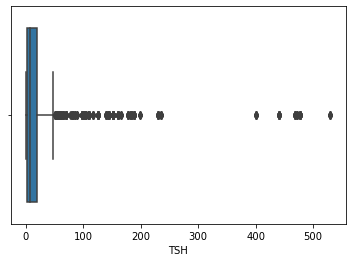

In [129]:
sns.boxplot(df['TSH'])

C:\anacoda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


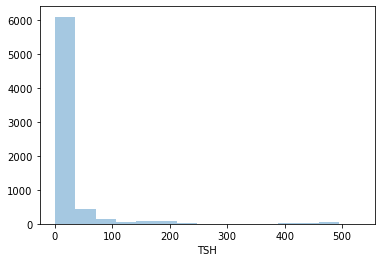

In [130]:
sns.distplot(df['TSH'],bins=15,kde=False)
plt.show()

In [131]:
df['TSH'].describe()


count    6962.000000
mean       22.354957
std        56.939783
min         0.005000
25%         1.400000
50%         6.900000
75%        20.000000
max       530.000000
Name: TSH, dtype: float64

In [132]:
#lets compute the Interquantile Range  to calculate the boundaries
IQR=df['TSH'].quantile(0.75)-df['TSH'].quantile(0.25)
IQR

18.6

In [133]:
# lower_bridge = df['TSH'].quantile(0.25)-(IQR*1.5)
# upper_bridge = df['TSH'].quantile(0.75)+(IQR*1.5)
# print('lower_bridge:',lower_bridge)
# print('upper_bridge:',upper_bridge)
# print('mean:',df['TSH'].mean())

In [134]:

lower_bridge = df['TSH'].quantile(0.25)-(IQR*3)
upper_bridge = df['TSH'].quantile(0.75)+(IQR*3)
print('lower_bridge:',lower_bridge)
print('upper_bridge:',upper_bridge)
print('mean:',df['TSH'].mean())

lower_bridge: -54.400000000000006
upper_bridge: 75.80000000000001
mean: 22.354956772333807


In [135]:
# FIG=df.boxplot(column='TSH')
# FIG

In [136]:
df['TSH'].mean()

22.354956772333807

C:\anacoda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


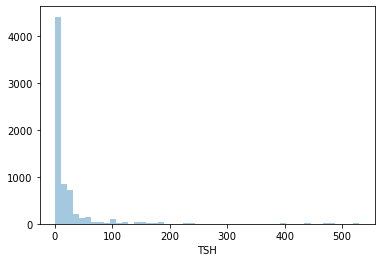

In [137]:
sns.distplot(df['TSH'],bins=50,kde=False)
plt.show()

In [138]:
data=df.copy()
data.loc[data['TSH']>=13.399999999999999,'TSH']=5.086766088745215
# data.loc[data['FTI']<=-9.0,'FTI']=0

In [139]:
data.TSH.describe()

count    6962.000000
mean        4.515258
std         3.363743
min         0.005000
25%         1.400000
50%         5.086766
75%         6.200000
max        13.000000
Name: TSH, dtype: float64

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSH'>

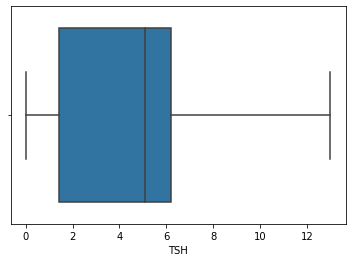

In [140]:
sns.boxplot(data['TSH'])

C:\anacoda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


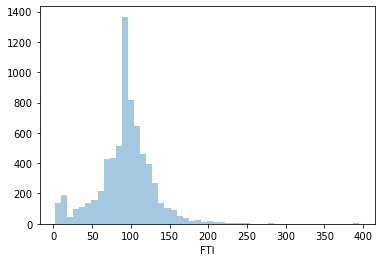

In [141]:
sns.distplot(df['FTI'],bins=50,kde=False)
plt.show()

In [142]:
df['FTI'].describe()

count    6962.000000
mean       93.467257
std        36.013574
min         2.000000
25%        77.000000
50%        93.467257
75%       112.000000
max       395.000000
Name: FTI, dtype: float64

In [143]:
#lets compute the Interquantile Range  to calculate the boundaries
IQR=df['FTI'].quantile(0.75)-df['FTI'].quantile(0.25)
IQR

35.0

In [144]:
#Assuming FTI follows Gaussion Distribution,we will calculate the boundaries with diffrentiates the outlier.

# print('lolower_bridge = df['FTI'].mean()-3*df['FTI'].std()
# upper_bridge = df['FTI'].mean()+3*df['FTI'].std()wer_bridge : ',lower_bridge)
# print('upper_bridge : ',upper_bridge)
# print('Mean :', df['FTI'].mean())

In [145]:
#Gaussion Distribution  We take (IQR*1.5), if we required extreme boundries the we can use (IQR*3)
lower_bridge = df['FTI'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['FTI'].quantile(0.75)+(IQR*1.5)
print('lower_bridge:',lower_bridge)
print('upper_bridge:',upper_bridge)
print('mean:',df['FTI'].mean())

lower_bridge: 24.5
upper_bridge: 164.5
mean: 93.46725747744966


In [146]:
# #Extreme Outlier
# lower_bridge = df['FTI'].quantile(0.25)-(IQR*3)
# upper_bridge = df['FTI'].quantile(0.75)+(IQR*3)
# print('lower_bridge:',lower_bridge)
# print('upper_bridge:',upper_bridge)
# print('mean:',df['FTI'].mean())

In [147]:
data=df.copy()
data.loc[data['FTI']>=162.125,'FTI']=162.125
data.loc[data['FTI']<=53.125,'FTI']=53.125

C:\anacoda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


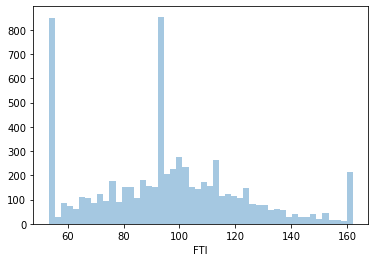

In [148]:
sns.distplot(data['FTI'],bins=50,kde=False)
plt.show()

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FTI'>

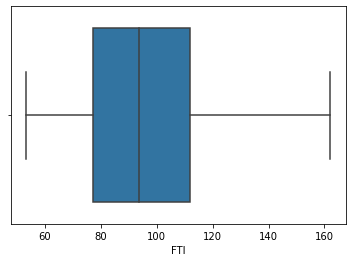

In [149]:
sns.boxplot(data['FTI'])

when the skewed

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSH'>

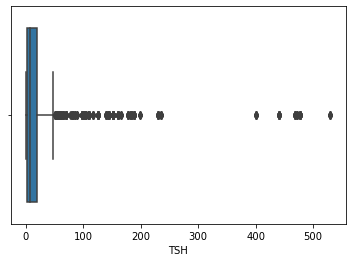

In [150]:
sns.boxplot(df['TSH'])

C:\anacoda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


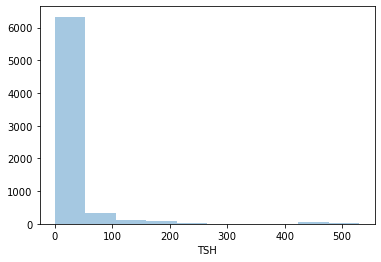

In [151]:
sns.distplot(df['TSH'],bins=10,kde=False)
plt.show()

In [152]:
df['TSH'].describe()

count    6962.000000
mean       22.354957
std        56.939783
min         0.005000
25%         1.400000
50%         6.900000
75%        20.000000
max       530.000000
Name: TSH, dtype: float64

In [153]:
#lets compute the Interquantile Range  to calculate the boundaries
IQR=df['TSH'].quantile(0.75)-df['TSH'].quantile(0.25)
IQR

18.6

In [154]:
#Extreme Outlier
#If Data is Skewed we must have to take (IQR*3)
lower_bridge = df['TSH'].quantile(0.25)-(IQR*3)
upper_bridge = df['TSH'].quantile(0.75)-(IQR*3)
print('lower_bridge:',lower_bridge)
print('upper_bridge:',upper_bridge)
print('mean:',df['TSH'].mean())

lower_bridge: -54.400000000000006
upper_bridge: -35.800000000000004
mean: 22.354956772333807


C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSH'>

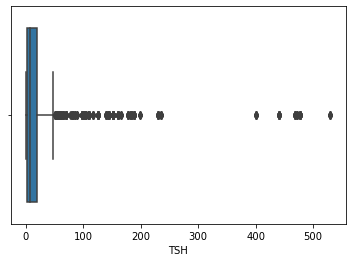

In [155]:
sns.boxplot(data['TSH'])

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TT4'>

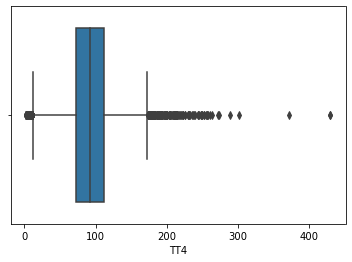

In [156]:
sns.boxplot(data['TT4'])

In [157]:
#lets compute the Interquantile Range  to calculate the boundaries
IQR=df['TT4'].quantile(0.75)-df['TT4'].quantile(0.25)
IQR




40.0

In [158]:
#Gaussion Distribution  We take (IQR*1.5), if we required extreme boundries the we can use (IQR*3)
lower_bridge = df['TT4'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['TT4'].quantile(0.75)+(IQR*1.5)
print('lower_bridge:',lower_bridge)
print('upper_bridge:',upper_bridge)
print('mean:',df['TT4'].mean())

lower_bridge: 12.0
upper_bridge: 172.0
mean: 91.77521303632858


In [159]:
data=df.copy()
data.loc[data['TT4']>=174.0,'TT4']=174.0
data.loc[data['TT4']<=38.0,'TT4']=38.0

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TT4'>

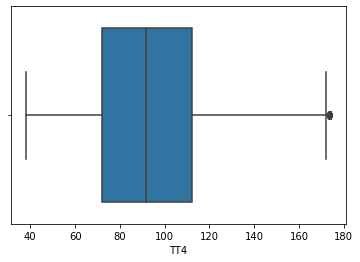

In [160]:
sns.boxplot(data['TT4'])

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


40.0

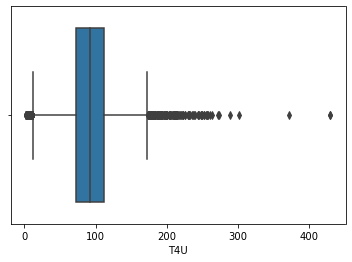

In [161]:
sns.boxplot(data['T4U'])
#lets compute the Interquantile Range  to calculate the boundaries
IQR=df['T4U'].quantile(0.75)-df['T4U'].quantile(0.25)
IQR



In [162]:
#Gaussion Distribution  We take (IQR*1.5), if we required extreme boundries the we can use (IQR*3)
lower_bridge = df['T4U'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['T4U'].quantile(0.75)+(IQR*1.5)
print('lower_bridge:',lower_bridge)
print('upper_bridge:',upper_bridge)
print('mean:',df['T4U'].mean())

lower_bridge: 12.0
upper_bridge: 172.0
mean: 91.77521303632858


In [163]:
data=df.copy()
data.loc[data['T4U']>=174.0,'T4U']=174.0
data.loc[data['T4U']<=38.0,'T4U']=38.0

C:\anacoda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='T4U'>

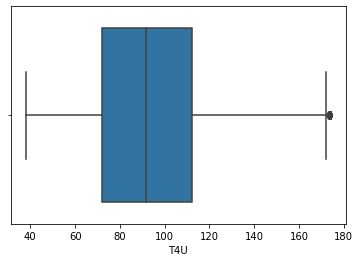

In [164]:
sns.boxplot(data['T4U'])

In [165]:
# from sklearn.preprocessing import StandardScaler
 
# scaler = StandardScaler()
# scaler.fit_transform(df[['TSH','TT4','FTI','T4U']])

from sklearn.preprocessing import MinMaxScaler
 
scaler_TSH = MinMaxScaler()
scaler_TSH.fit(data[['TSH']])
data['scale_TSH'] = scaler_TSH.transform(data[['TSH']])

scaler_TT4 = MinMaxScaler()
scaler_TT4.fit([data['TT4']])
data['scale_TT4'] = scaler_TSH.transform(data[['TT4']])

scaler_FTI = MinMaxScaler()
scaler_FTI.fit(data[['FTI']])
data['scale_FTI'] = scaler_TSH.transform(data[['FTI']])

scaler_T4U = MinMaxScaler()
scaler_T4U.fit(data[['T4U']])
data['scale_T4U'] = scaler_TSH.transform(data[['T4U']])


scaler_binaryClass = MinMaxScaler()
scaler_binaryClass.fit(data[['binaryClass']])
data['scale_binaryClass'] = scaler_TSH.transform(data[['binaryClass']])






C:\anacoda python\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TT4
Feature names seen at fit time, yet now missing:
- TSH

  warnings.warn(message, FutureWarning)
C:\anacoda python\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- FTI
Feature names seen at fit time, yet now missing:
- TSH

  warnings.warn(message, FutureWarning)
C:\anacoda python\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- T4U
Feature names seen at fit time, yet now missing:
- TSH

  warnings.warn(message, FutureWarning)
C:\anacoda python\lib\site-packages\s

In [166]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,referral source,binaryClass,scale_TSH,scale_TT4,scale_FTI,scale_T4U,scale_binaryClass
1181,79.0,0,0,0,0,0,0,0,0,0,...,144.0,1,111.0,4,1,0.012821,0.271691,0.209427,0.271691,0.001877
3535,32.0,1,0,0,0,0,0,0,0,0,...,38.0,1,3.0,4,1,0.205653,0.005651,0.005651,0.071689,0.001877
1244,55.0,1,0,0,0,0,0,0,0,0,...,38.0,1,13.0,4,1,0.113199,0.026406,0.024519,0.071689,0.001877
800,65.0,0,0,0,0,0,0,0,0,0,...,38.0,1,14.0,3,1,0.103765,0.028293,0.026406,0.071689,0.001877
2255,52.0,0,0,0,0,0,0,0,0,0,...,109.0,1,102.0,4,1,0.022632,0.205653,0.192445,0.205653,0.001877


In [167]:
X= data[['scale_TSH','scale_TT4','scale_FTI','scale_T4U']]
y=data['binaryClass']

In [168]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size =0.3 ,random_state = 42,stratify=y)

In [169]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.63507547, 0.22757484, 0.21730663, 0.23879392])

In [170]:
mutual_info_series = pd.Series(mutual_info)
mutual_info_series.index = X_train.columns

In [171]:
mutual_info_series

scale_TSH    0.635075
scale_TT4    0.227575
scale_FTI    0.217307
scale_T4U    0.238794
dtype: float64

In [172]:
mutual_info_series.sort_values(ascending=True)

scale_FTI    0.217307
scale_TT4    0.227575
scale_T4U    0.238794
scale_TSH    0.635075
dtype: float64

<AxesSubplot:>

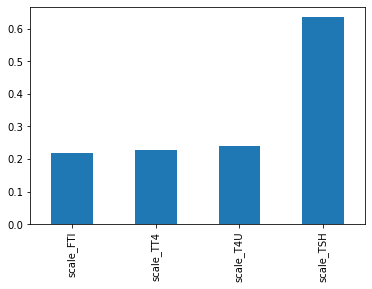

In [173]:
mutual_info_series.sort_values(ascending=True).plot.bar()

In [174]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(data, test_size=0.2)

In [175]:
# train.shape
# test.shape

In [176]:
# X= test[['scale_TSH','scale_TT4','scale_FTI','scale_T4U']]
# y=test['binaryClass']

In [177]:
X= data[['TSH','TT4','FTI','T4U']]
y=data['binaryClass']

In [178]:

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size =0.3 ,random_state = 1,stratify=y)

In [179]:
print("X_train :-",X_train.shape)
print("X_test :-",X_test.shape)
print("y_train :-",y_train.shape)
print("y_test :-",y_test.shape)

X_train :- (4873, 4)
X_test :- (2089, 4)
y_train :- (4873,)
y_test :- (2089,)


In [180]:
#     #create a model
    
#     from sklearn.naive_bayes import GaussianNB
#     NB_Model = GaussianNB()

#     #Train/fit() the model
#     NB_Model.fit(X_train,y_train)

#     # find y_ prediction
#     y_pred = NB_Model.predict(X_test)


In [181]:
#     #calculating the accuracy
#     from sklearn import metrics

#     acc=metrics.accuracy_score(y_test,y_pred)
#     print("Accuracy",acc*100)

In [182]:
# # find CM
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# plt.figure(figsize=(10,6))
# sns.heatmap(cm,annot=True)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")

# # find Precision
# from sklearn.metrics import precision_score
# print("Precision_score :-", precision_score(y_test,y_pred, average='weighted'))

# # find Precision
# from sklearn.metrics import recall_score
# print("recall_score :-",recall_score(y_test, y_pred ,average='weighted'))

# # find f-1 score
# from sklearn.metrics import f1_score
# print("f1_score :-",f1_score(y_test,y_pred,average='weighted'))

# print()
# from sklearn.metrics import classification_report
# target_names = ['0','1']

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# print("True positive = ",cm[0][0])
# print("False positive = ",cm[0][1])
# print("False negative = ",cm[1][0])
# print("True negative = ",cm[1][1])


In [183]:
# # k = 3,5,9,11,15,17,19,21,23,25,27,29

# accuracy =[]
# error_rate = []
# for k in range(1,30,2):

# #create a model
#     from sklearn.neighbors import KNeighborsClassifier
#     KNN_Model = KNeighborsClassifier(n_neighbors=k)

#     #Train/fit() the model
#     KNN_Model.fit(X_train,y_train)

#     # find y_ prediction
#     y_pred = KNN_Model.predict(X_test)


#     #calculating the accuracy
#     from sklearn import metrics

#     acc=metrics.accuracy_score(y_test,y_pred)

#     accuracy.append(acc)
#     error_rate.append(1-acc)

# print("Task Completed")


In [184]:
# #Graph betn k and accuracy
# plt.plot(range(1,30,2),accuracy,"*-")
# plt.xlabel('k-val')
# plt.ylabel('Accuracy')


In [185]:
# # find CM
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# plt.figure(figsize=(10,6))
# sns.heatmap(cm,annot=True)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")

# # find Precision
# from sklearn.metrics import precision_score
# print("Precision_score :-", precision_score(y_test,y_pred, average='weighted'))

# # find Precision
# from sklearn.metrics import recall_score
# print("recall_score :-",recall_score(y_test, y_pred ,average='weighted'))

# # find f-1 score
# from sklearn.metrics import f1_score
# print("f1_score :-",f1_score(y_test,y_pred,average='weighted'))

# print()
# from sklearn.metrics import classification_report
# target_names = ['0','1']

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)
# print("True positive = ",cm[0][0])
# print("False positive = ",cm[0][1])
# print("False negative = ",cm[1][0])
# print("True negative = ",cm[1][1])


In [186]:
# from sklearn.svm import SVC
# # Training a SVM classifier using SVC class
# svm = SVC(kernel= 'poly', random_state=42, C=0.1)
# svm.fit(X_train, y_train)
# from sklearn import metrics
# acc = metrics.accuracy_score(y_test,y_pred)
# y_pred = svm.predict(X_test)
# acc = metrics.accuracy_score(y_test,y_pred)
# print("Accuracy for 80-20 spliting and k=1 :-",acc*100)

In [187]:
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
# if(y_pred[3]==1):
#       print("positive")
# else:
#     print("negative")
                


In [188]:
data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,referral source,binaryClass,scale_TSH,scale_TT4,scale_FTI,scale_T4U,scale_binaryClass
1181,79.0,0,0,0,0,0,0,0,0,0,...,144.0,1,111.0,4,1,0.012821,0.271691,0.209427,0.271691,0.001877
3535,32.0,1,0,0,0,0,0,0,0,0,...,38.0,1,3.0,4,1,0.205653,0.005651,0.005651,0.071689,0.001877
1244,55.0,1,0,0,0,0,0,0,0,0,...,38.0,1,13.0,4,1,0.113199,0.026406,0.024519,0.071689,0.001877
800,65.0,0,0,0,0,0,0,0,0,0,...,38.0,1,14.0,3,1,0.103765,0.028293,0.026406,0.071689,0.001877
2255,52.0,0,0,0,0,0,0,0,0,0,...,109.0,1,102.0,4,1,0.022632,0.205653,0.192445,0.205653,0.001877


In [189]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.990426041168023


Precision_score :- 0.9906058338221447
recall_score :- 0.990426041168023
f1_score :- 0.9904251196414641
Accuracy: 0.990426041168023

True positive =  1024
False positive =  20
False negative =  0
True negative =  1045


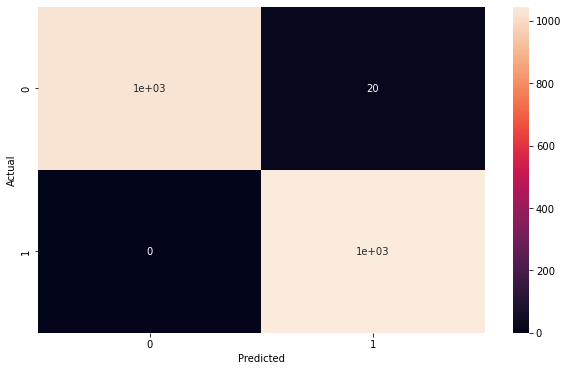

In [190]:
# find CM
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# find Precision
from sklearn.metrics import precision_score
print("Precision_score :-", precision_score(y_test,y_pred, average='weighted'))

# find Precision
from sklearn.metrics import recall_score
print("recall_score :-",recall_score(y_test, y_pred ,average='weighted'))

# find f-1 score
from sklearn.metrics import f1_score
print("f1_score :-",f1_score(y_test,y_pred,average='weighted'))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print()
from sklearn.metrics import classification_report
target_names = ['0','1']

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("True positive = ",cm[0][0])
print("False positive = ",cm[0][1])
print("False negative = ",cm[1][0])
print("True negative = ",cm[1][1])



In [191]:
import pickle
pickle.dump(clf, open('Throid.pkl', 'wb'))

In [192]:
TSH = float(input('enter tsh:-'))
TT4 = float(input('enter tsh:-'))
FTI = float(input('enter tsh:-'))
T4U = float(input('enter tsh:-'))



clf.predict([[TSH,TT4,FTI,T4U]])
# print(y_pred)
if(clf.predict([[TSH,TT4,FTI,T4U]])[0]==1):
      print("positive")
else:
    print("negative")
                
        
                
       
            

  
    
 
     




enter tsh:-455
enter tsh:-458
enter tsh:-52336
enter tsh:-5696
negative


C:\anacoda python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\anacoda python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [193]:
# type(data['scale_TSH'][0])

In [194]:
# 7 P
# 6 P
# 5 N
# 2 N
# 1 N
# 0.5 N
# 3 N

In [195]:
# enter tsh3.0
# enter tt41.32
# enter fti5.0
# enter t4u5.12
# [0]

# enter tsh8.0
# enter tt44.2
# enter fti41.
# enter t4u10.2
# negative


# enter tsh2.0
# enter tt44.5
# enter fti4.2
# enter t4u20.
# negative


# enter tsh6.0
# enter tt442
# enter fti21
# enter t4u10.2
# negative







# import joblib
# joblib.dump(clf,'RF_Model.pkl')
# print("Model Saved")


# age = float(input("Enter Age "))
# LR_model.predict([[age]])
# if(LR_model.predict([[age]])[0]==1):
#     print("Will Buy Insurance :")
# else:
#     print("Will not Buy Insurance")



# y_pred=clf.predict(X_test)
# y_pred

In [196]:
# enter tsh1
# enter tt499
# enter fti92
# enter t4u1.07